<a href="https://colab.research.google.com/github/HongTuoiNguyen02/BTVN_Nguyen-Hong-Tuoi_20104071/blob/main/Tu%E1%BA%A7n_3_(fuzz).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
 pip install scikit-fuzzy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 993 kB 7.8 MB/s 
  Created wheel for scikit-fuzzy: filename=scikit_fuzzy-0.4.2-py3-none-any.whl size=894089 sha256=daf493c0002ad27e3276ef0754dafce5a128a9b0ee0767c660a2468e55f7e91b
  Stored in directory: /root/.cache/pip/wheels/d5/74/fc/38588a3d2e3f34f74588e6daa3aa5b0a322bd6f9420a707131
Successfully built scikit-fuzzy


In [ ]:
#VE TAM GIAC
import numpy as np
import skfuzzy as fuzz
x=np.arange (11)
mfx= fuzz.trimf(x,[0,5,10]) #tam giac vuong [0,0,5]
x
mfx



array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 0.8, 0.6, 0.4, 0.2, 0. ])

21.666666666666668


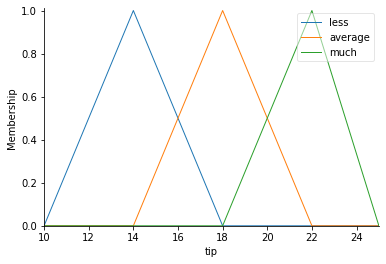

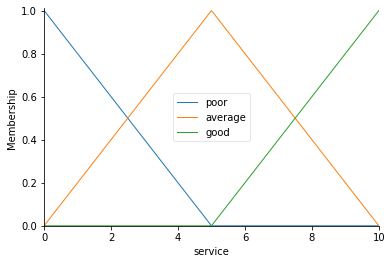

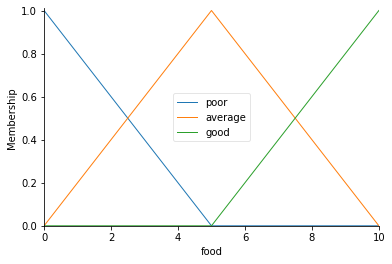

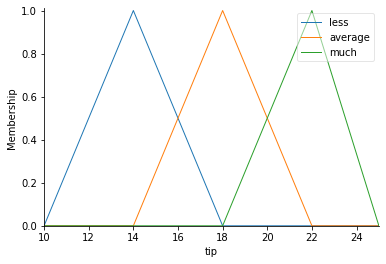

In [ ]:
#BAI TOAN TIEN TIP

import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['average']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping=ctrl.ControlSystemSimulation (tipping_ctrl)
tipping.input['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)

service.view()
food.view()
tip.view()



21.666666666666668


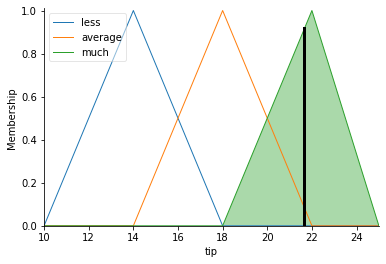

In [ ]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
food=ctrl.Antecedent(np.arange(0,11,1),'food')
service=ctrl.Antecedent(np.arange(0,11,1),'service')
tip= ctrl.Consequent(np.arange(10,26,1),'tip')

food['poor']=fuzz.trimf(food.universe,[0,0,5])
food['average']=fuzz.trimf(food.universe,[0,5,10])
food['good']=fuzz.trimf(food.universe,[5,10,10])

service['poor']=fuzz.trimf(service.universe,[0,0,5])
service['average']=fuzz.trimf(service.universe,[0,5,10])
service['good']=fuzz.trimf(service.universe,[5,10,10])

tip['less']=fuzz.trimf(tip.universe,[10,14,18])
tip['average']=fuzz.trimf(tip.universe,[14,18,22])
tip['much']=fuzz.trimf(tip.universe,[18,22,25])

rule1=ctrl.Rule(food['poor'] & service['poor'], tip['less'])
rule2=ctrl.Rule(food['average'] & service['poor'], tip['less'])
rule3=ctrl.Rule(food['good'] & service['poor'], tip['less'])
rule4=ctrl.Rule(food['poor'] & service['average'], tip['average'])
rule5=ctrl.Rule(food['average'] & service['average'], tip['average'])
rule6=ctrl.Rule(food['good'] & service['average'], tip['average'])
rule7=ctrl.Rule(food['poor'] & service['good'], tip['much'])
rule8=ctrl.Rule(food['average'] & service['good'], tip['much'])
rule9=ctrl.Rule(food['good'] & service['good'], tip['much'])

tipping_ctrl=ctrl.ControlSystem([rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9])
tipping=ctrl.ControlSystemSimulation (tipping_ctrl)
tipping.input ['food']=10
tipping.input['service']=10
tipping.compute()
print(tipping.output['tip'])
tip.view(sim=tipping)


70.00000000000003


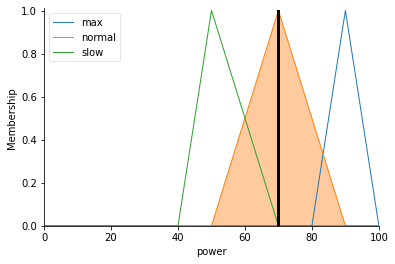

In [ ]:
#BAI TOAN NOI COM DIEN
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl
time = ctrl.Antecedent(np.arange(10,121,1),'time')
rice = ctrl.Antecedent(np.arange(100,1001,1),'rice')#đầu vào
power = ctrl.Consequent(np.arange(0,101,1),'power')

time['veryfast']=fuzz.trimf(time.universe,[10,10,40])
time['fast']=fuzz.trimf(time.universe,[20,40,50])
time['average']=fuzz.trimf(time.universe,[50,60,70])
time['slow']=fuzz.trimf(time.universe,[70,80,90])
time['veryslow']=fuzz.trimf(time.universe,[80,100,100])

rice['veryless']=fuzz.trimf(rice.universe,[100,100,300])
rice['less']=fuzz.trimf(rice.universe,[200,300,400])
rice['average']=fuzz.trimf(rice.universe,[400,500,600])
rice['much']=fuzz.trimf(rice.universe,[600,700,800])
rice['verymuch']=fuzz.trimf(rice.universe,[800,1000,1000])

power['max']=fuzz.trimf(power.universe,[80,90,100])
power['normal']=fuzz.trimf(power.universe,[50,70,90])
power['slow']=fuzz.trimf(power.universe,[40,50,70])

rule1=ctrl.Rule(time['veryfast'] & rice['veryless'],power['normal'])
rule2=ctrl.Rule(time['veryfast'] & rice['less'],power['normal'])
rule3=ctrl.Rule(time['veryfast'] & rice['average'],power['slow'])
rule4=ctrl.Rule(time['veryfast'] & rice['much'],power['max'])
rule5=ctrl.Rule(time['veryfast'] & rice['verymuch'],power['max'])

rule6=ctrl.Rule(time['fast'] & rice['veryless'],power['normal'])
rule7=ctrl.Rule(time['fast'] & rice['less'],power['slow'])
rule8=ctrl.Rule(time['fast'] & rice['average'],power['slow'])
rule9=ctrl.Rule(time['fast'] & rice['much'],power['max'])
rule10=ctrl.Rule(time['fast'] & rice['verymuch'],power['max'])

rule11=ctrl.Rule(time['average'] & rice['veryless'],power['normal'])
rule12=ctrl.Rule(time['average'] & rice['less'],power['normal'])
rule13=ctrl.Rule(time['average'] & rice['average'],power['normal'])
rule14=ctrl.Rule(time['average'] & rice['much'],power['slow'])
rule15=ctrl.Rule(time['average'] & rice['verymuch'],power['slow'])

rule16=ctrl.Rule(time['slow'] & rice['veryless'],power['normal'])
rule17=ctrl.Rule(time['slow'] & rice['less'],power['normal'])
rule18=ctrl.Rule(time['slow'] & rice['average'],power['slow'])
rule19=ctrl.Rule(time['slow'] & rice['much'],power['slow'])
rule20=ctrl.Rule(time['slow'] & rice['verymuch'],power['slow'])

rule21=ctrl.Rule(time['veryslow'] & rice['veryless'],power['normal'])
rule22=ctrl.Rule(time['veryslow'] & rice['less'],power['normal'])
rule23=ctrl.Rule(time['veryslow'] & rice['average'],power['normal'])
rule24=ctrl.Rule(time['veryslow'] & rice['much'],power['slow'])
rule25=ctrl.Rule(time['veryslow'] & rice['verymuch'],power['max'])

cooking_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12,rule13,rule14,rule15,rule16,rule17,rule18,rule19,rule20,rule21,rule22,rule23,rule24,rule25])
cooking=ctrl.ControlSystemSimulation(cooking_ctrl)
cooking.input['rice']=10
cooking.input['time']=10
cooking.compute()
print(cooking.output["power"])
power.view(sim=cooking)


